<a href="https://colab.research.google.com/github/sindyalvinaa/PCVK_Genap_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

#Konvolusi tanpa Library

**Membuat fungsi konvolusi**

fungsi konvolusi yang dibuat memiliki parameter berupa:

1. citra masukan
2. kernel berupa matriks untuk memfilter citra
3. nilai stride / besarnya pergeseran untuk setiap konvolusi
4. nilai pad yang akan ditambahkan pada citra

In [3]:
def convolution2d(image, kernel, stride, padding):
    # Korelasi silang
    kernel = np.flipud(np.fliplr(kernel))

    # Mendapatkan shape dari kernel dan padding sesuai parameter masukan
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Menghitung shape dari output konvolusi
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / stride) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / stride) + 1)
    output = np.zeros((xOutput, yOutput))

    # Menerapkan equal padding ke semua sisi
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        #print(imagePadded)
    else:
        imagePadded = image
     # Akses pixel
    for y in range(image.shape[1]):
        # Keluar dari konvolusi
        if y > image.shape[1] - yKernShape:
            break
        # Konvolusi dilakukan, jika hasil bagi y dengan stride = 0
        if y % stride == 0:
            for x in range(image.shape[0]):
                # Melanjutkan ke baris berikutnya setelah kernel berada di luar batas
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Konvolusi dilakukan, jika hasil bagi x dengan stride = 0
                    if x % stride == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output
     

In [14]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#SHARPEN

In [15]:
# Sharpen

kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

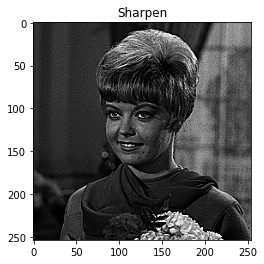

In [16]:
img_sharpen = img_gray.copy()
img_sharpen = convolution2d(img_sharpen, kernel_sharpen,1,0)

plt.title("Sharpen")
plt.imshow(img_sharpen, cmap='gray',vmin=0, vmax=255)

#EMBOSS

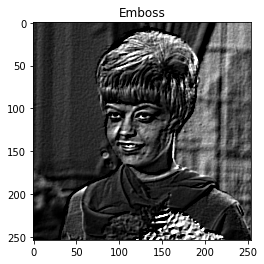

In [17]:
# Emboss
kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])

img_emboss = img_gray.copy()
img_emboss = convolution2d(img_emboss, kernel_emboss,1,0)

plt.title("Emboss")
plt.imshow(img_emboss, cmap='gray',vmin=0, vmax=255)
     

#LEFT SOBEL EDGE DETECTION

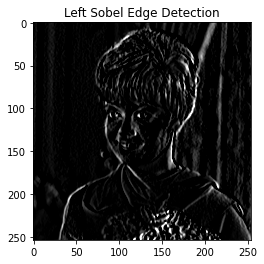

In [18]:
# Left Sobel Edge Detection

kernel_LSED = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])

img_LSED = img_gray.copy()
img_LSED = convolution2d(img_LSED, kernel_LSED,1,0)

plt.title("Left Sobel Edge Detection")
plt.imshow(img_LSED, cmap='gray',vmin=0, vmax=255)

#CANNY EDGE DETECTION

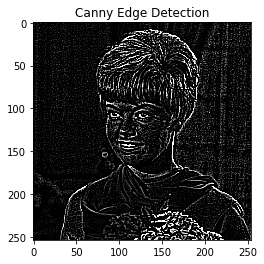

In [19]:
# Canny Edge Detection

kernel_CED = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])

img_CED = img_gray.copy()
img_CED = convolution2d(img_CED, kernel_CED,1,0)

plt.title("Canny Edge Detection")
plt.imshow(img_CED, cmap='gray',vmin=0, vmax=100)
# cv2_imshow(img_CED)

#21X21 GAUSSIAN BLUR

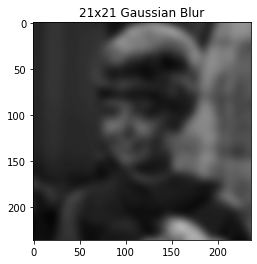

In [20]:
# 21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel((kernel_size), sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

img_blur = img_gray.copy()
img_blur = convolution2d(img_blur, gauss_kernel,1,0)

plt.title("21x21 Gaussian Blur")
plt.imshow(img_blur, cmap='gray',vmin=0, vmax=255)
# cv2_imshow(img_blur)